# Bellabeat Analysis
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player inglobal smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat
executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These questions
will guide your analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


## Business task: 
* Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices
* Use one Bellabeat product to apply these insights into the presentation.

Data sources: https://www.kaggle.com/arashnic/fitbit made available by Mobius.
Data was in .CSV format
The data does not ROCC.

## Stakeholders:
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

## Loading packages





In [1]:
library(ggplot2)
library(tidyr)
library(tidyverse)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.1.8
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Importing the data frames

In [2]:
Daily_activities <- read.csv("/kaggle/input/fitbit-dataset/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
Daily_sleep <- read.csv("/kaggle/input/fitbit-dataset/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit-dataset/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# Cleaning the data


In [3]:
weight <- weight %>% 
  distinct() %>% 
  select(-Fat) %>% 
  drop_na()


Daily_activities<- Daily_activities %>%
  distinct() %>%
  drop_na()

Daily_sleep <- Daily_sleep %>%
  distinct() %>%
  drop_na()

# Merging data
I want to merge the data into one big data frame for convenience

In [4]:
Daily_activities <- Daily_activities %>% mutate(row_id = row_number())
Daily_sleep <- Daily_sleep %>% mutate(row_id = row_number())
merged_df1 <- merge(Daily_activities, Daily_sleep, by = "row_id")

merged_df1<- merged_df1 %>% mutate(row_id = row_number())

weight<- weight %>% mutate(row_id = row_number()) %>% drop_na(WeightKg)

master_df<- merge(merged_df1, weight, by = "row_id")

I added the "row_id" because merging by "Id" caused my data to have a lot of duplicates.So I added "row_id" as a unique column to join the two data frames.



# Analysis:

I want to check the weight classes that make up the population
 

In [5]:
# Adding new column "WeightClass"
master_df <- master_df %>%
mutate(WeightClass = cut(WeightKg, breaks = seq(52.6, 133.5, by = 5),
labels = paste(seq(52.6, 128.5, by = 5), "-", seq(57.5, 133.5, by = 5)),
include.lowest = TRUE))




#### Plotting the bar chart:

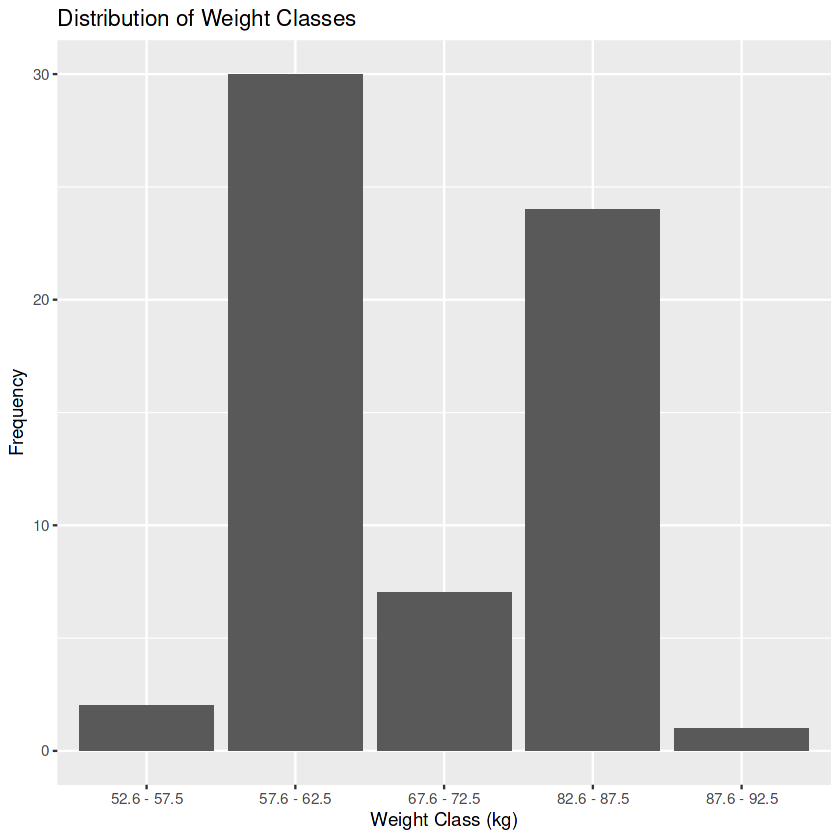

In [6]:
ggplot(master_df[!is.na(master_df$WeightClass),], aes(x = WeightClass)) +
  geom_bar() +
  xlab("Weight Class (kg)") +
  ylab("Frequency") +
  ggtitle("Distribution of Weight Classes")

#### I also want to check which BMI category makes up the population

In [7]:
# Creating new column "BMI_category"

master_df$BMI_category <- ifelse(master_df$BMI < 18.5, "Underweight",
                          ifelse(master_df$BMI>18.5 & master_df$BMI < 25, "Ideal",
                                 ifelse(master_df$BMI>25 & master_df$BMI < 30, "Overweight", "Obese")))

#### Plotting the bar chart:

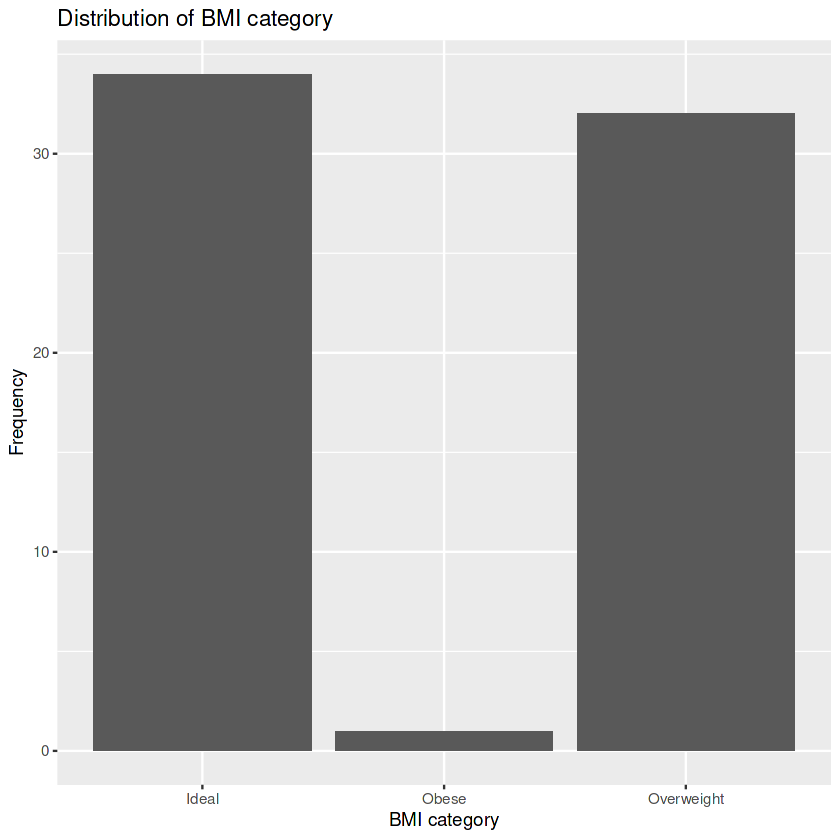

In [8]:
ggplot(master_df, aes(x = BMI_category)) +
  geom_bar() +
  xlab("BMI category") +
  ylab("Frequency") +
  ggtitle("Distribution of BMI category")

#### note: 
* We can see from the two plots that the population is made up of people with Obese,overweight and people with Ideal BMI. 
* We can also see that the People with Ideal BMI make up most parts of the population and the Obese make up the lesser parts of the population.


next we will be using box plot to see which category burns the most calories

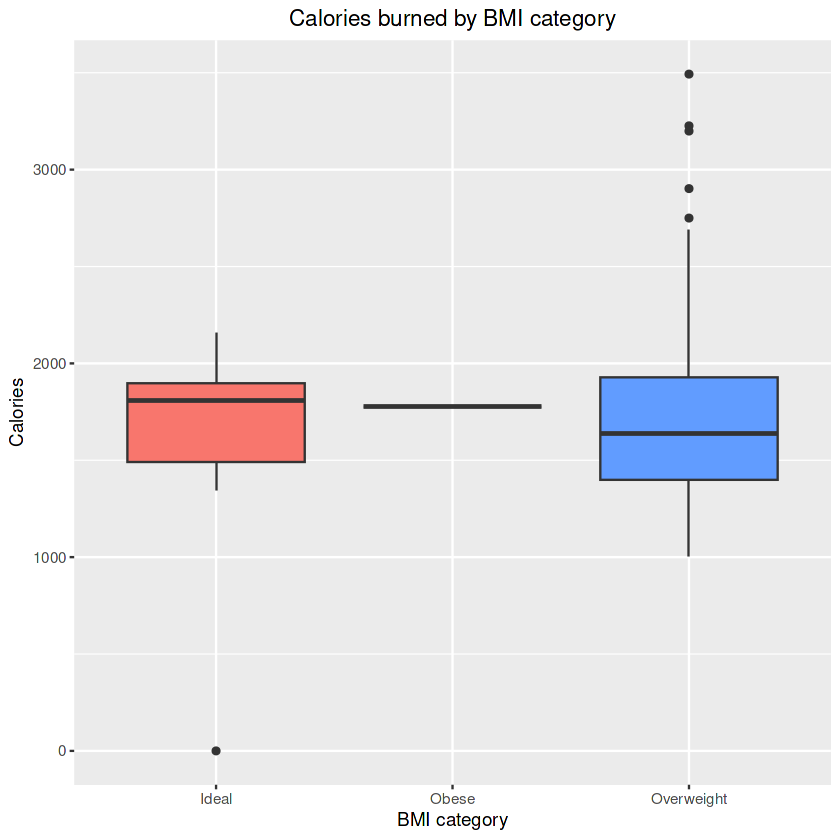

In [9]:

ggplot(master_df[!is.na(master_df$BMI_category),], aes(BMI_category, Calories, fill=BMI_category)) +
  geom_boxplot() +
  theme(legend.position="none") +
  labs(title="Calories burned by BMI category", x="BMI category") +
  theme(legend.position="none", text = element_text(angle=360),plot.title = element_text(hjust = 0.5))


#### note:
* We can see from the plot that the **Ideal category** burns the most calories, followed by the Obese category calories.
* However, some users in the **Overweight category**  burn more calories than the some in the **Ideal category**




 Next up, we will be using box plot to see which category sleeps the most.

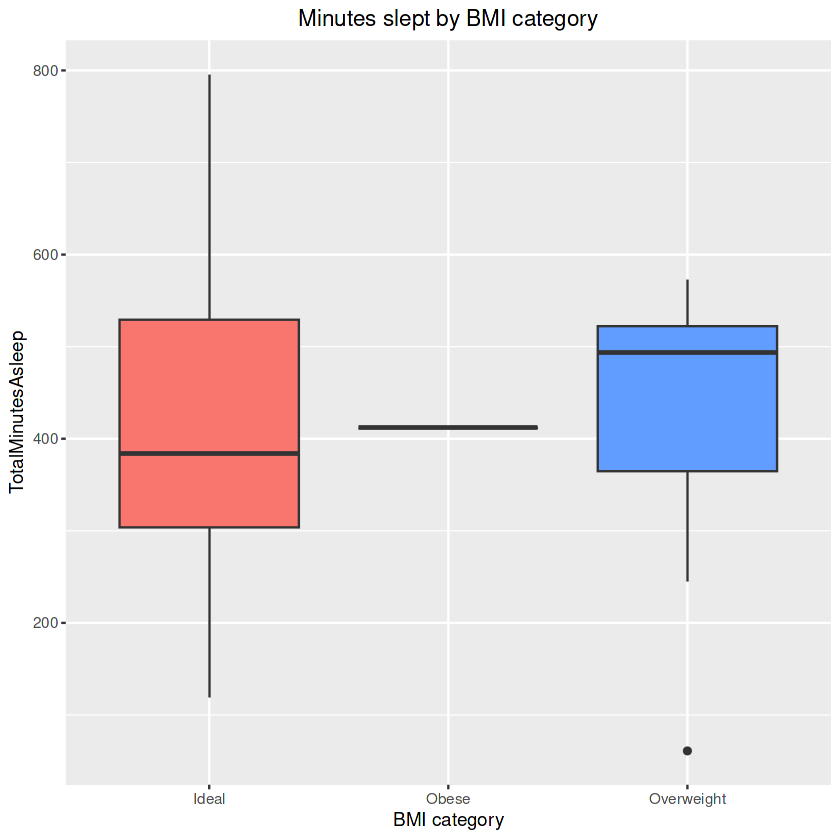

In [10]:
ggplot(master_df[!is.na(master_df$BMI_category),], aes(BMI_category, TotalMinutesAsleep, fill=BMI_category)) +
  geom_boxplot() +
  theme(legend.position="none") +
  labs(title="Minutes slept by BMI category", x="BMI category") +
  theme(legend.position="none", text = element_text(angle=360),plot.title = element_text(hjust = 0.5))

#### Note:
* We can see from the plot that the users **overweight category** get the most sleep.
* The users in the **Ideal Category** get the least sleep.










Next up, we will checking which category  travels the most distance.

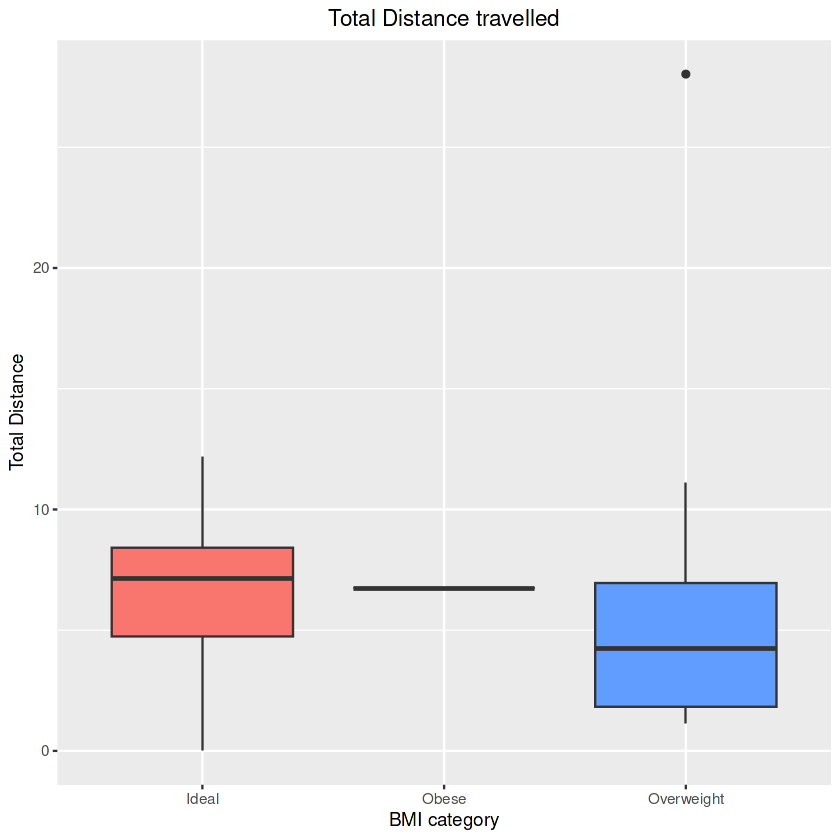

In [11]:
ggplot(master_df[!is.na(master_df$BMI_category),], aes(BMI_category, TotalDistance, fill=BMI_category)) +
  geom_boxplot() +
  theme(legend.position="none") +
  labs(title="Total Distance travelled", x="BMI category",y="Total Distance") +
  theme(legend.position="none", text = element_text(angle=360),plot.title = element_text(hjust = 0.5))

Now, we will be looking at the most active Category:

* First of all, we have to sum up all their active minutes.

In [12]:
master_df$TotalActiveMinutes <- rowSums(master_df[, c("VeryActiveMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes")], na.rm = TRUE)
aggregate(TotalActiveMinutes ~ BMI_category, data = master_df, FUN = mean)


BMI_category,TotalActiveMinutes
<chr>,<dbl>
Ideal,244.5882
Obese,222.0000
Overweight,205.2500


We want see if there is a relationship between the Total Active minutes and the calories burned:

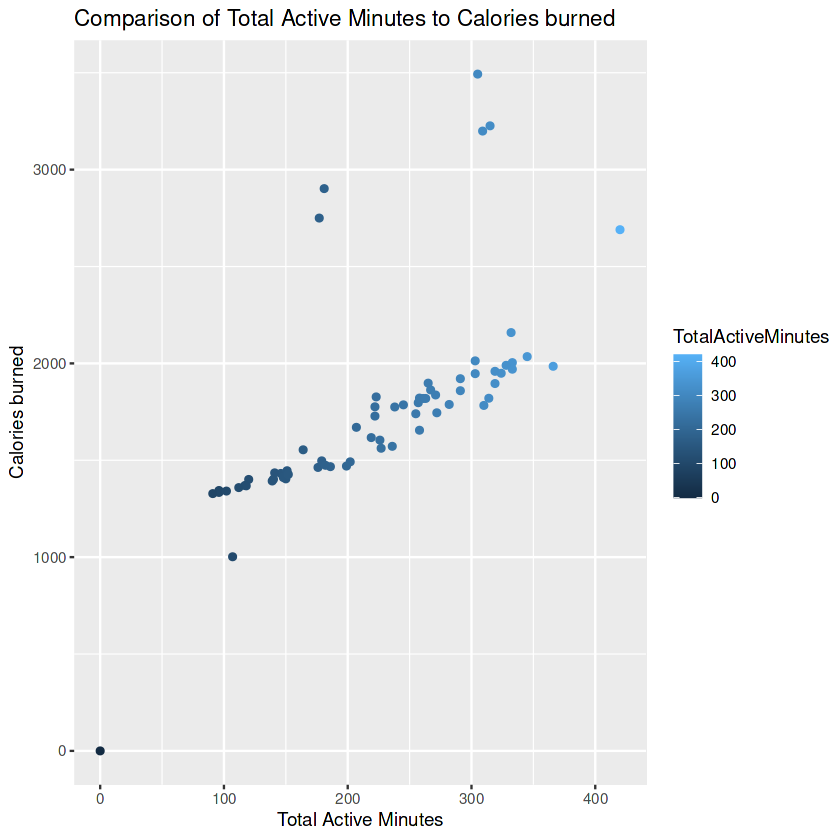

In [13]:
ggplot(master_df, aes(x=TotalActiveMinutes,y=Calories,color=TotalActiveMinutes))+geom_point()+labs(x="Total Active Minutes",y="Calories burned")+ggtitle("Comparison of Total Active Minutes to Calories burned")

* We can see that there is a positive relationship between the total active minutes and the calories burned.


Note: This could suggest that individuals who engage in more very active physical activity tend to be more active in general and are more likely to burn more calories

We also want to use spearman's correlation coefficient to see how strongly related these variables are.


In [14]:
correlation <- cor(master_df$TotalActiveMinutes,master_df$Calories)
 correlation

[1] 0.6773626

We have a correlation coefficient of **0.677** , which means that there is a moderately strong linear relationship between Total Active Minutes and Calories burned.

However, it is important to note that correlation does not imply causation.

 Finally, we will be checking which BMI category is the most active.

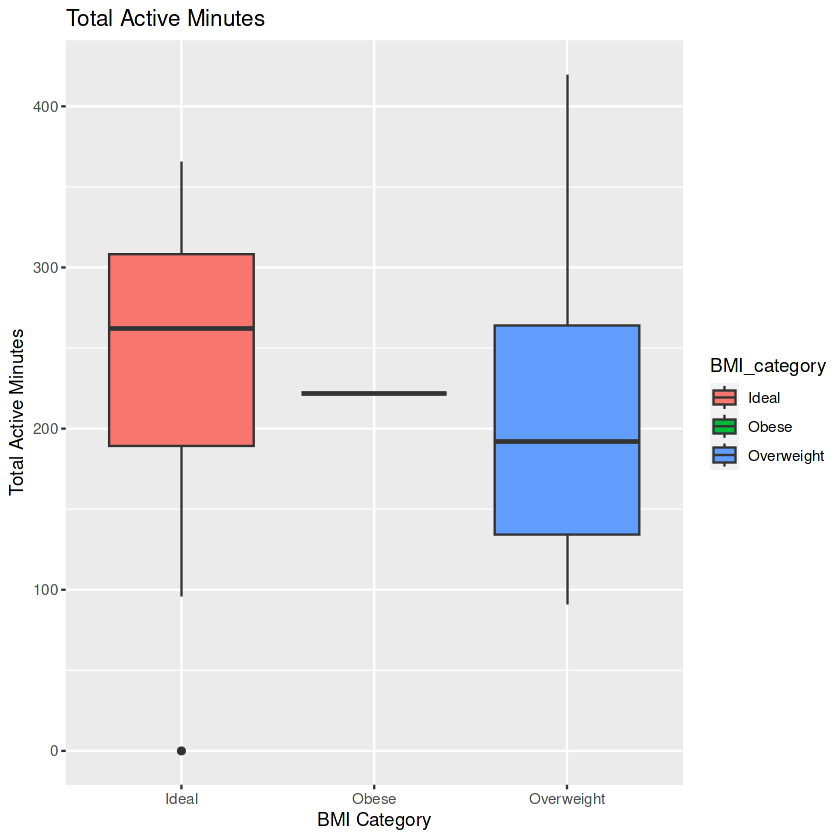

In [15]:
ggplot(master_df[!is.na(master_df$BMI_category),], aes(x = BMI_category, y = TotalActiveMinutes, fill=BMI_category)) +
  geom_boxplot() +
  labs(x = "BMI Category", y = "Total Active Minutes")+
ggtitle("Total Active Minutes")

From our plot, the Ideal category is the most active once again, followed by the obese category, then the overweight , I'm really proud of the obese person by the way. Hopefully that person leaves that category.

## Conclusion:
From the data above, we can see the following:
* There is more active a user is,the more likely the user is to burn more calories. While a higher level of physical activity may be associated with burning more calories, there may be other factors at play that affect calorie burn, such as metabolism, diet, and genetics.

* A higher population of the users are people with ideal BMI probably trying to maintain their BMI. This may not necessarily be the only factor at play. Other factors such as genetics, lifestyle, and cultural factors may also play a role in determining one's BMI.

* The people with Ideal BMI are the most active. it is possible that individuals with an ideal BMI may be more likely to engage in physical activity as a means of maintaining their weight. However, this relationship may not hold true for all individuals, and there may be other factors at play.

* Finally, the relationship between BMI and sleep quality is complex and multifaceted. While it is possible that individuals with an ideal BMI may have poorer sleep quality, there are many other factors that can affect sleep, including stress, diet, and sleep hygiene habits.




# Suggestions:

* The Bellabeat membership program would be the most preferred product to carry out these recommendations. The membership program provides users with personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals, 

* Target users with ideal BMI: Since the majority of users have an ideal BMI, the company can focus on developing products and features that cater specifically to this group. This can include offering personalized meal plans, workout routines, and other features that help users maintain their ideal BMI.



## Thank you !

